https://www.kaggle.com/code/bryanb/xgboost-explainability-with-shap

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
#!pip install dataretrieval
import dataretrieval.nwis as nwis
import pandas as pd # read data from a CSV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
import numpy as np

In [17]:
site  = "13211205"
# get basic info about the site
df3 = nwis.get_record(sites=site, service='site')

dec_lat_va=df3['dec_lat_va'][0]
dec_long_va=df3['dec_long_va'][0]
station_nm=df3['station_nm'][0]
alt_va =df3['alt_va'][0] 
drain_area_va=df3['drain_area_va'][0] 

In [19]:
# path to the csv file
path=  r"../data_prep/prism_df_summer_" +site +".csv"  # os.path.join( r"../data_prep/prism_df_summer_",  site ,".csv" )

data=pd.read_csv( path )  

print(data)

     Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0           153  2016-06-01      0.00               8.9               18.3   
1           154  2016-06-02      0.00               9.7               21.4   
2           155  2016-06-03      0.00              13.9               21.7   
3           156  2016-06-04      0.00              13.5               22.0   
4           157  2016-06-05      0.00              13.4               23.7   
..          ...         ...       ...               ...                ...   
656        2639  2023-08-27      2.75              16.2               24.8   
657        2640  2023-08-28      0.00              15.9               24.4   
658        2641  2023-08-29      0.00              16.1               25.6   
659        2642  2023-08-30      0.00              12.7               23.0   
660        2643  2023-08-31      0.00               9.8               17.3   

     tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  vpdmax

In [21]:
X = data[[ 'X_00060_00003','tmean..degrees.C.' ]]
y = data['X_00010_00003']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state = 42)

# Need index of car prices to predict, whatever the strategy is
indexes_cars_predicted = X_test.index

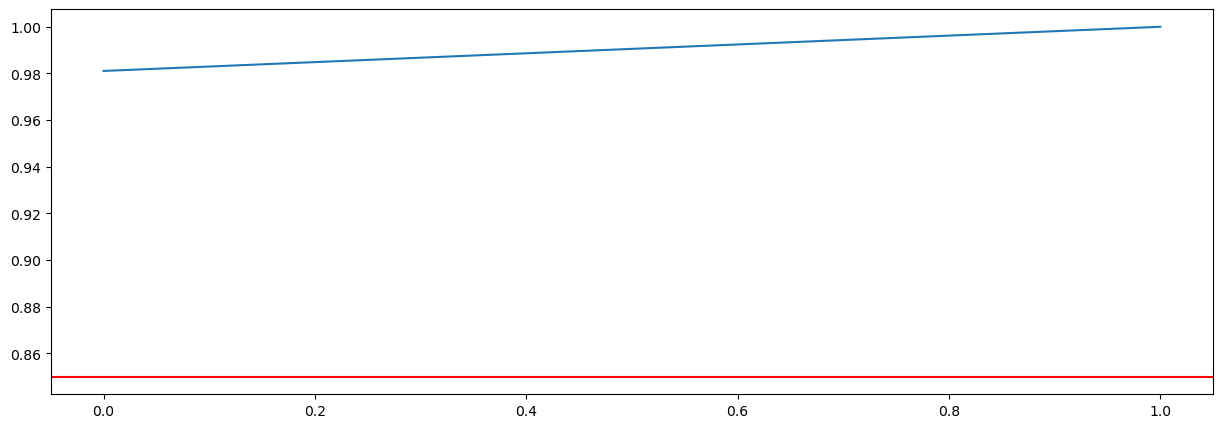

In [39]:
#model = ensemble.RandomForestRegressor(n_jobs=-1, n_estimators = 100, random_state=42)
#model.fit(train_X_train, train_y_train)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

# Graphs section
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(111)
plt.plot(np.cumsum(regr.feature_importances_))
plt.axhline(0.85,color= 'r')